In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
upload = files.upload()

Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


In [0]:
df_polution_beijing = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [5]:
df_polution_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df_polution_beijing.shape

(43824, 13)

In [7]:
df_polution_beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [8]:
df_polution_beijing.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [0]:
df_polution_beijing['datetime']=df_polution_beijing[['year', 'month', 'day', 'hour']].apply(lambda row: 
                                                                                            datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour'])
                                                                                            , axis=1)

In [16]:
df_polution_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [18]:
print('Initial data collect', df_polution_beijing['datetime'].min())
print('Final date of collect', df_polution_beijing['datetime'].max())

Initial data collect 2010-01-01 00:00:00
Final date of collect 2014-12-31 23:00:00


In [19]:
df_pressure_atmosphecric = df_polution_beijing[['datetime', 'PRES']]
df_pressure_atmosphecric.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [20]:
df_pressure_atmosphecric.sort_values('datetime', ascending=True, inplace=True) # ordering by date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_pressure_atmosphecric.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


Text(0.5, 1.0, 'Box plot to pressure atmospheric')

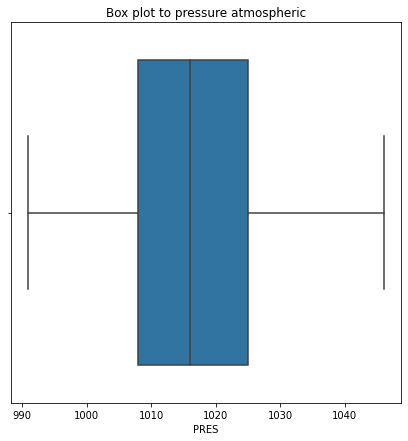

In [22]:
plt.figure(figsize=(7, 7))
g = sns.boxplot(df_pressure_atmosphecric['PRES'])
g.set_title('Box plot to pressure atmospheric')

Text(0, 0.5, 'Pressure Atmospheric in hPa')

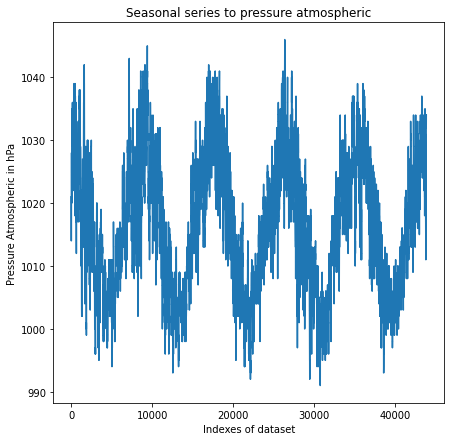

In [23]:
 plt.figure(figsize=(7,7))
 g = sns.lineplot(x=df_pressure_atmosphecric.index, y=df_pressure_atmosphecric['PRES'])
 g.set_title('Seasonal series to pressure atmospheric')
 g.set_xlabel('Indexes of dataset')
 g.set_ylabel('Pressure Atmospheric in hPa')

In [25]:
# PREPARE THE DATA TO BE USING BY MODEL PREVISION NEURAL NETWORK MULTI PERCEPTRO
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # define the range between 1 and 0
df_pressure_atmosphecric['PRES_normalized'] = scaler.fit_transform(np.array(df_pressure_atmosphecric['PRES']).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
df_pressure_atmosphecric.head()

,datetime,PRES,PRES_normalized
0,2010-01-01 00:00:00,1021.0,0.545455
1,2010-01-01 01:00:00,1020.0,0.527273
2,2010-01-01 02:00:00,1019.0,0.509091
3,2010-01-01 03:00:00,1019.0,0.509091
4,2010-01-01 04:00:00,1018.0,0.490909


In [28]:
# divide between training and test
date_cut = datetime.datetime(year=2014, month=1, day=1, hour=0) # define the cut date to 01/01/2014
df_training = df_pressure_atmosphecric.loc[df_pressure_atmosphecric['datetime'] < date_cut]
df_test= df_pressure_atmosphecric.loc[df_pressure_atmosphecric['datetime']>=date_cut]
print('Quantity  of data to training ', df_training.shape)
print('Quantity of data to test ', df_test.shape)

Quantity  of data to training  (35064, 3)
Quantity of data to test  (8760, 3)


Text(0, 0.5, 'Reads normalized')

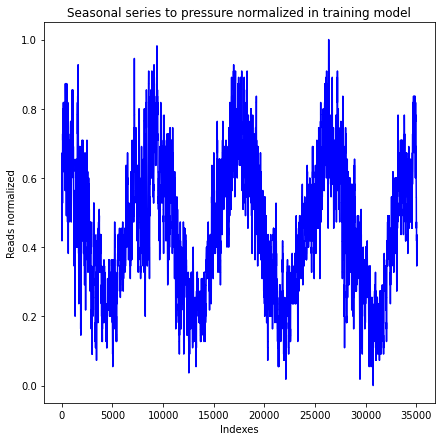

In [30]:
plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_training.index, y=df_training['PRES_normalized'], color='b')
g.set_title('Seasonal series to pressure normalized in training model')
g.set_xlabel('Indexes')
g.set_ylabel('Reads normalized')

Text(0, 0.5, 'Reads normalized')

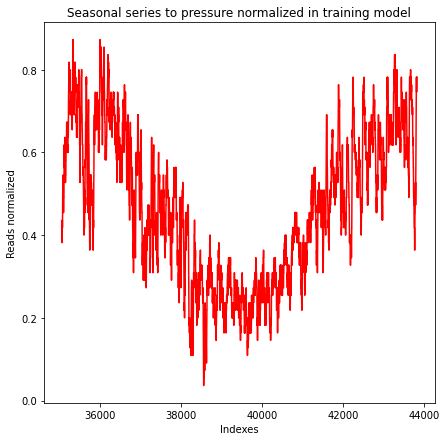

In [31]:
plt.figure(figsize=(7,7))
g = sns.lineplot(x=df_test.index, y=df_test['PRES_normalized'], color='r')
g.set_title('Seasonal series to pressure normalized in training model')
g.set_xlabel('Indexes')
g.set_ylabel('Reads normalized')

In [0]:
# define the number of values to be using in predict
def format_input_out(seasonal_series_original, number_steps):

  x = []
  y = []
  for i in range(number_steps, seasonal_series_original.shape[0]):
    x.append(list(seasonal_series_original.loc[i-number_steps:i-1]))
    y.append(seasonal_series_original.loc[i])
  x, y = np.array(x), np.array(y)
  return x, y

In [34]:
x_train, y_train = format_input_out(df_training['PRES_normalized'], 10)
print('Format of data', x_train.shape, y_train.shape)

Format of data (35054, 10) (35054,)


In [35]:
x_train[1:15, :]

array([[0.52727273, 0.50909091, 0.50909091, 0.49090909, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.50909091, 0.49090909, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727],
       [0.50909091, 0.49090909, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.43636364],
       [0.49090909, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.47272727, 0.43636364, 0.43636364],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.47272727, 0.43636364, 0.43636364, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.47272727, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.47272727, 0.47272727, 0.47272727, 0.47272727, 0.47272727,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.43636364],
       [0.47272727, 0.47272727, 0.4727272

In [36]:
x_test, y_test = format_input_out(df_test['PRES_normalized'].reset_index(drop=True), 10)
print('Format of data', x_test.shape, y_test.shape)

Format of data (8750, 10) (8750,)


In [37]:
x_test[1:15, :]

array([[0.4       , 0.4       , 0.4       , 0.38181818, 0.38181818,
        0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364],
       [0.4       , 0.4       , 0.38181818, 0.38181818, 0.38181818,
        0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364],
       [0.4       , 0.38181818, 0.38181818, 0.38181818, 0.4       ,
        0.4       , 0.41818182, 0.43636364, 0.43636364, 0.43636364],
       [0.38181818, 0.38181818, 0.38181818, 0.4       , 0.4       ,
        0.41818182, 0.43636364, 0.43636364, 0.43636364, 0.41818182],
       [0.38181818, 0.38181818, 0.4       , 0.4       , 0.41818182,
        0.43636364, 0.43636364, 0.43636364, 0.41818182, 0.41818182],
       [0.38181818, 0.4       , 0.4       , 0.41818182, 0.43636364,
        0.43636364, 0.43636364, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.4       , 0.41818182, 0.43636364, 0.43636364,
        0.43636364, 0.41818182, 0.41818182, 0.41818182, 0.41818182],
       [0.4       , 0.41818182, 0.4363636

In [0]:
# start the prevision of MPL
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD # define model of optimization using gradient descent

In [0]:
# define the input layer
layer_input = Input(shape=(10,), dtype='float32')

In [0]:
# define hidden layers
dense1 = Dense(32, activation='linear')(layer_input)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)

In [0]:
# using the Dropout to regularize the model (avoid overfiting)
layer_dropout = Dropout(0.2)(dense3)

In [0]:
layer_out = Dense(1, activation='linear')(layer_dropout)

In [0]:
# define the model MLP
model_MLP = tf.keras.Model(inputs=layer_input, outputs=layer_out)

In [48]:
model_MLP.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
___________________________________________________________

In [0]:
# define the function error and optimizer to be used
model_MLP.compile(loss='mean_squared_error', optimizer='adam') # function loss MSE and optimizer adam

In [50]:
# training the model
model_MLP.fit(x=x_train, y=y_train, batch_size=16, epochs=20, verbose=1, shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0055
Epoch 2/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 3/20
2191/2191 [==============================] - 3s 1ms/step - loss: 8.8320e-04
Epoch 4/20
2191/2191 [==============================] - 3s 1ms/step - loss: 8.2900e-04
Epoch 5/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.9061e-04
Epoch 6/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.8786e-04
Epoch 7/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.7101e-04
Epoch 8/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.7334e-04
Epoch 9/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.6499e-04
Epoch 10/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.7255e-04
Epoch 11/20
2191/2191 [==============================] - 3s 1ms/step - loss: 7.6314e-04
Epoch 12/20
2191/2191 [==========================

In [51]:
# realize the prevision with model MPL
prevision = model_MLP.predict(x_test)
prevision_PRES = scaler.inverse_transform(prevision) # apply the inverse of transformation
prevision_PRES.shape

(8750, 1)

In [0]:
from sklearn.metrics import r2_score # import the coeficient of determination

In [53]:
r2 = r2_score(df_test['PRES'].iloc[10:], prevision_PRES)
print('Coeficient of determination to TEST (MLP)', round(r2, 4))

Coeficient of determination to TEST (MLP) 0.9927


Text(0.5, 0, 'Indexes')

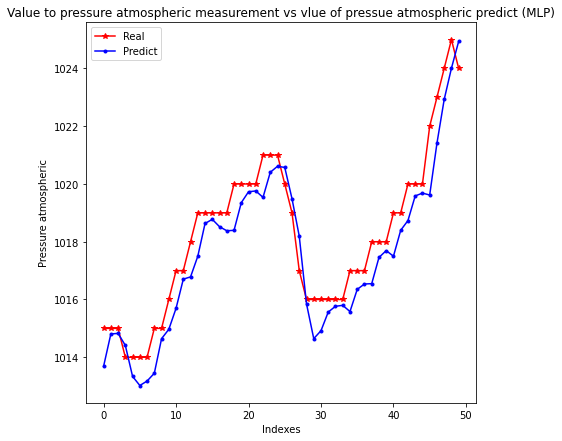

In [57]:
# plot real values X predict values
plt.figure(figsize=(7,7))
plt.plot(range(50), df_test['PRES'].iloc[10: 60], linestyle='-', marker='*', color='r')
plt.plot(range(50), prevision_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Real', 'Predict'], loc=2)
plt.title('Value to pressure atmospheric measurement vs vlue of pressue atmospheric predict (MLP)')
plt.ylabel('Pressure atmospheric')
plt.xlabel('Indexes')

In [0]:
# using a neural network convolutional CNN
from tensorflow.keras.layers import Flatten # transform the data in one dimension
from tensorflow.keras.layers import ZeroPadding1D # complete the data after the convolutional
from tensorflow.keras.layers import Conv1D # layer convolutional
from tensorflow.keras.layers import AveragePooling1D # layer to decrease Polling

In [0]:
# define the layer input
layer_input_cnn = Input(shape=(10, 1), dtype='float32')

In [0]:
# add the layer of padding
layer_padding = ZeroPadding1D(padding=1)(layer_input_cnn) # keep the data

In [0]:
# add the convolutional layer
layer_convolutional_1D = Conv1D(64, 3, strides=1, use_bias=True)(layer_padding) # add 64 filters in a frame of convolutional=3

In [0]:
# polling layer
layer_pooling = AveragePooling1D(pool_size=3, strides=1)(layer_convolutional_1D) # reduce through the value mean find to the convolutional (can be the value max too)

In [0]:
# flatten layer
flatten_layer = Flatten()(layer_pooling) # using to do the "reshape" of data to a vector

In [0]:
layer_dropout_cnn = Dropout(0.2)(flatten_layer)

In [0]:
layer_out_cnn = Dense(1, activation='linear')(layer_dropout_cnn)

In [0]:
model_cnn = tf.keras.Model(inputs=layer_input_cnn, outputs=layer_out_cnn)

In [68]:
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 12, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 64)            256       
_________________________________________________________________
average_pooling1d (AveragePo (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513 

In [0]:
# add function loss and optimize 
model_cnn.compile(loss='mean_absolute_error', optimizer='adam')

In [70]:
# reshape the data to input to cnn cause nedd 3d dimension
x_train, x_test = x_train.reshape(x_train.shape[0], x_train.shape[1], 1), x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train.shape, x_test.shape) 

(35054, 10, 1) (8750, 10, 1)


In [71]:
model_cnn.fit(x=x_train, y=y_train,epochs=20, verbose=1, batch_size=16, shuffle=True)

Epoch 1/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0286
Epoch 2/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0174
Epoch 3/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0154
Epoch 4/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0142
Epoch 5/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0141
Epoch 6/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0139
Epoch 7/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0137
Epoch 8/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0139
Epoch 9/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0134
Epoch 10/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0135
Epoch 11/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0134
Epoch 12/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0134
E

In [0]:
# predict CNN
prevision_cnn = model_cnn.predict(x_test)
PRES_cnn = np.squeeze(scaler.inverse_transform(prevision_cnn))

In [73]:
r2_cnn = r2_score(df_test['PRES'].iloc[10:], PRES_cnn)
print('Coeficient of determination to TEST (CNN)', round(r2_cnn, 4))

Coeficient of determination to TEST (MLP) 0.9945


Text(0.5, 0, 'Indexes')

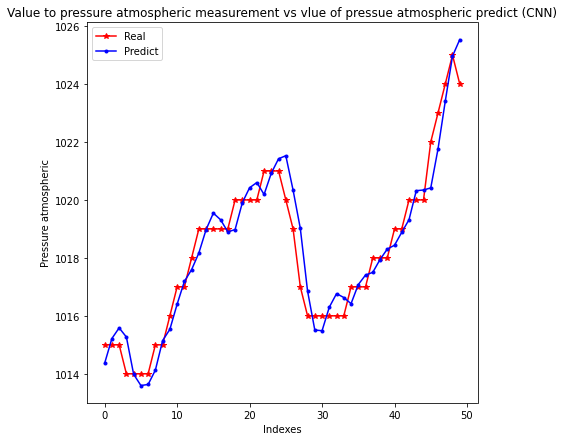

In [76]:
# plot real values X predict values
plt.figure(figsize=(7,7))
plt.plot(range(50), df_test['PRES'].iloc[10: 60], linestyle='-', marker='*', color='r')
plt.plot(range(50), PRES_cnn[:50], linestyle='-', marker='.', color='b')
plt.legend(['Real', 'Predict'], loc=2)
plt.title('Value to pressure atmospheric measurement vs vlue of pressue atmospheric predict (CNN)')
plt.ylabel('Pressure atmospheric')
plt.xlabel('Indexes')